https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

###### best is SARIMAX

In [1]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [2]:
#read the data
df = pd.read_csv("E:\IIT Kanpur\Placements\Projects\SBI Stock price prediction\\SBIN.NS.csv")#, parse_dates=[['Date', 'Time']])

In [3]:
df['Date'] = pd.to_datetime(df.Date)# , format = '%d/%m/%Y %H.%M.%S')

In [4]:
data = df.drop(['Date'], axis=1)
data.index = df.Date

In [5]:
data.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-17,272.399994,274.0,270.500000,271.100006,265.187134,5571891
2015-07-20,272.000000,272.0,266.149994,267.450012,261.616760,6418930


In [62]:
train_df = data.iloc[:int(df.shape[0]*0.9825), :]
valid_df = data.iloc[int(df.shape[0]*0.9825):, :]

In [63]:
train_df.shape, valid_df.shape

((1206, 6), (22, 6))

# 1. Autoregression (AR)

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is suitable for univariate time series without trend and seasonal components.

In [64]:
train_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-17,272.399994,274.000000,270.500000,271.100006,265.187134,5571891
2015-07-20,272.000000,272.000000,266.149994,267.450012,261.616760,6418930
2015-07-21,267.000000,269.799988,263.500000,264.299988,258.535431,5638653
2015-07-22,263.700012,269.399994,261.899994,268.549988,262.692749,11322177
2015-07-23,268.500000,272.000000,267.250000,270.049988,264.160034,6376216
...,...,...,...,...,...,...
2020-06-10,184.550003,189.000000,183.800003,187.699997,187.699997,67333317
2020-06-11,188.000000,190.399994,176.350006,177.149994,177.149994,91726802
2020-06-12,170.000000,180.000000,169.800003,179.149994,179.149994,92758901


In [65]:
len(valid_df), len(train_df)

(22, 1206)

In [66]:
# AR example
from statsmodels.tsa.ar_model import AutoReg

# fit model
model = AutoReg(train_df['Close'], lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1206, 1227)
print(yhat)

1206    173.490226
1207    174.076237
1208    174.658056
1209    175.235714
1210    175.809240
1211    176.378664
1212    176.944016
1213    177.505324
1214    178.062617
1215    178.615925
1216    179.165275
1217    179.710696
1218    180.252216
1219    180.789863
1220    181.323664
1221    181.853648
1222    182.379841
1223    182.902270
1224    183.420963
1225    183.935946
1226    184.447246
1227    184.954889
dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [67]:
yhat.index = valid_df.index

In [68]:
mse(yhat, valid_df['Close'])

71.51664021656873

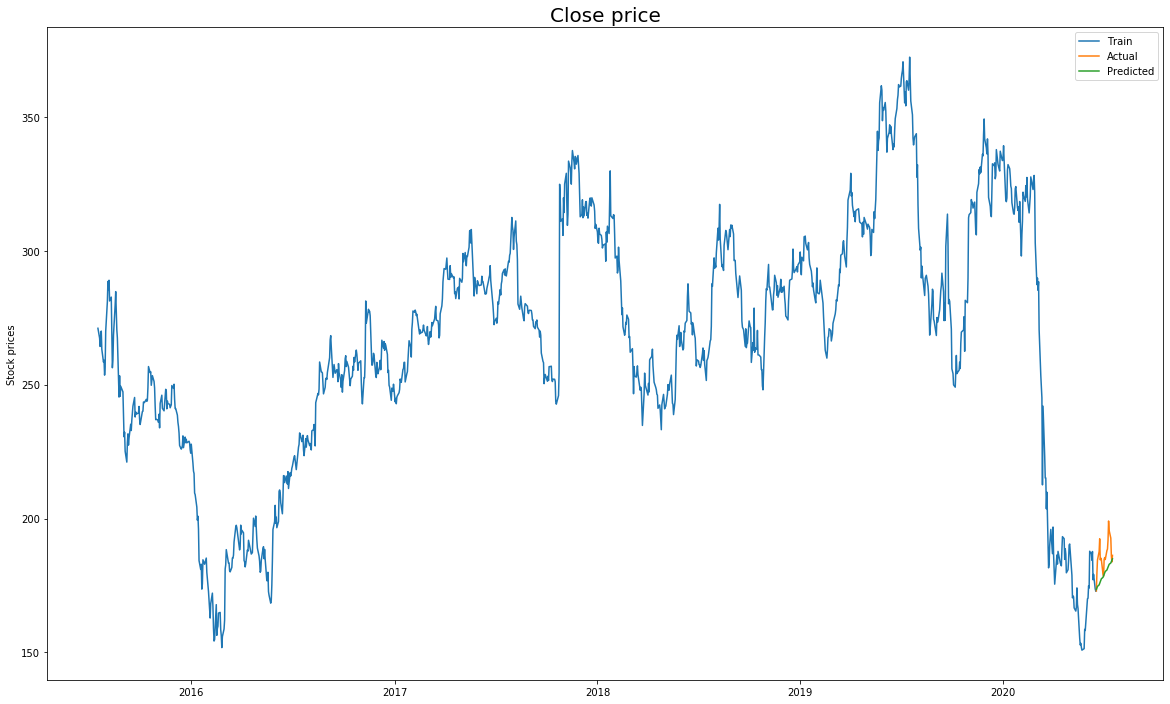

In [69]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

# 2. Moving Average

The moving average (MA) method models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.

A moving average model is different from calculating the moving average of the time series.

The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.

The method is suitable for univariate time series without trend and seasonal components.

In [75]:
# MA example
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(0, 5))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1206, 1227)
print(yhat)

# model = AutoReg(train_df['Close'], lags=1)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.predict(982, 1227)
# print(yhat)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1206    183.769960
1207    200.618931
1208    224.741294
1209    243.584725
1210    259.072448
1211    266.570127
1212    266.570127
1213    266.570127
1214    266.570127
1215    266.570127
1216    266.570127
1217    266.570127
1218    266.570127
1219    266.570127
1220    266.570127
1221    266.570127
1222    266.570127
1223    266.570127
1224    266.570127
1225    266.570127
1226    266.570127
1227    266.570127
dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [76]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

5354.559685434786

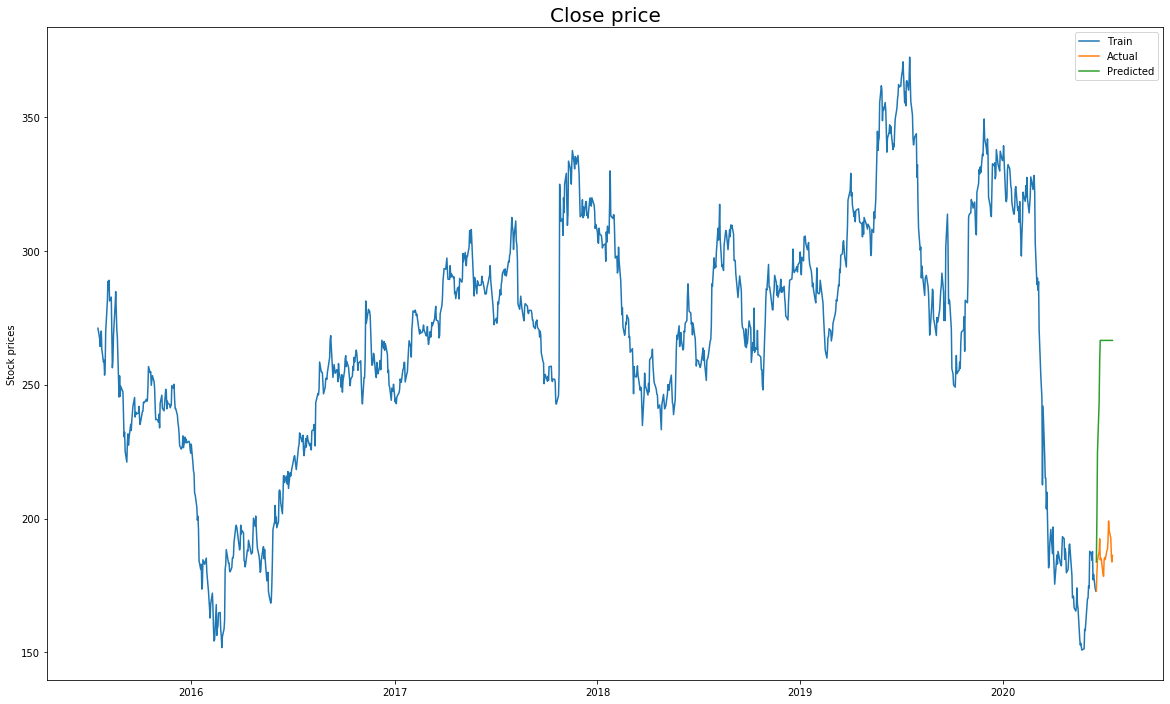

In [77]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

# 3. Autoregressive Moving Average (ARMA)

The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and resiudal errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

The method is suitable for univariate time series without trend and seasonal components.

In [78]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1206, 1227)
print(yhat)

# model = AutoReg(train_df['Close'], lags=1)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.predict(982, 1227)
# print(yhat)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1206    173.785193
1207    174.679425
1208    175.581861
1209    176.491700
1210    177.408172
1211    178.330536
1212    179.258076
1213    180.190106
1214    181.125962
1215    182.065010
1216    183.006637
1217    183.950256
1218    184.895302
1219    185.841233
1220    186.787529
1221    187.733690
1222    188.679239
1223    189.623718
1224    190.566688
1225    191.507728
1226    192.446437
1227    193.382432
dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [79]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

41.062175136648754

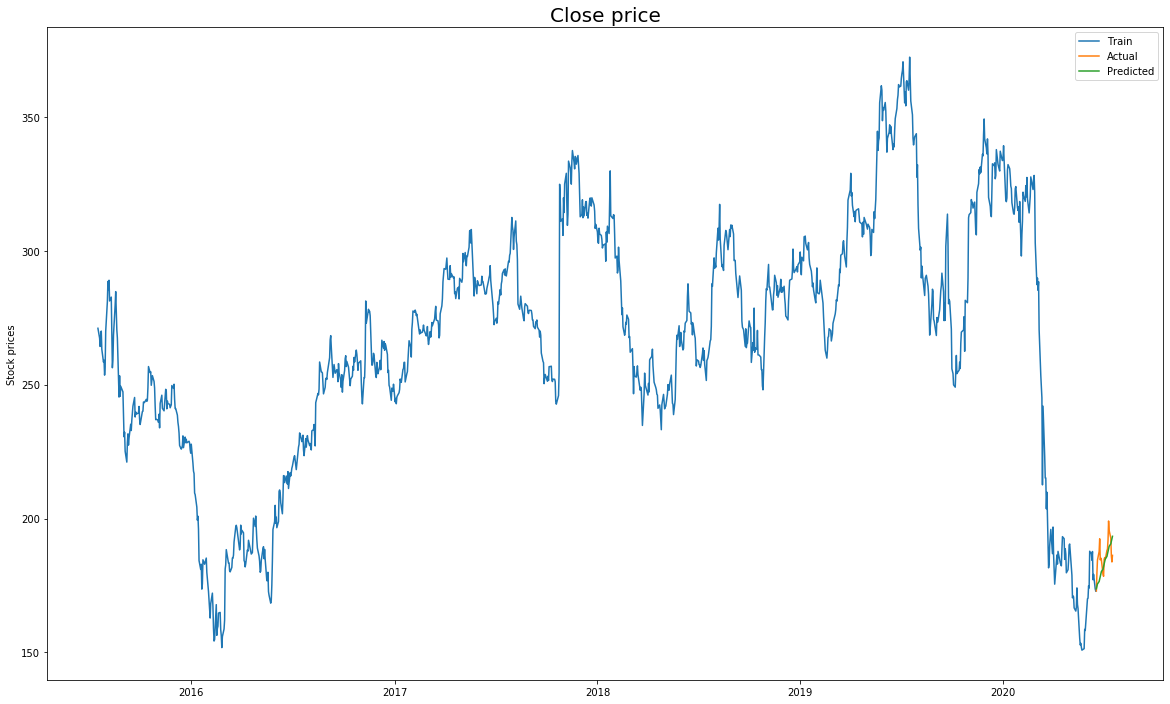

In [80]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

# 4. Autoregressive Integrated Moving Average (ARIMA)

The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

The method is suitable for univariate time series with trend and without seasonal components.

In [101]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1206, 1227, typ='levels')
print(yhat)

# model = AutoReg(train_df['Close'], lags=1)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.predict(982, 1227)
# print(yhat)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


1205    172.775566
1206    172.711451
1207    172.622914
1208    172.544266
1209    172.461614
1210    172.380583
1211    172.298895
1212    172.217474
1213    172.135945
1214    172.054459
1215    171.972956
1216    171.891460
1217    171.809961
1218    171.728463
1219    171.646965
1220    171.565466
1221    171.483968
1222    171.402470
1223    171.320972
1224    171.239474
1225    171.157976
1226    171.076477
dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [102]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

239.8547578611575

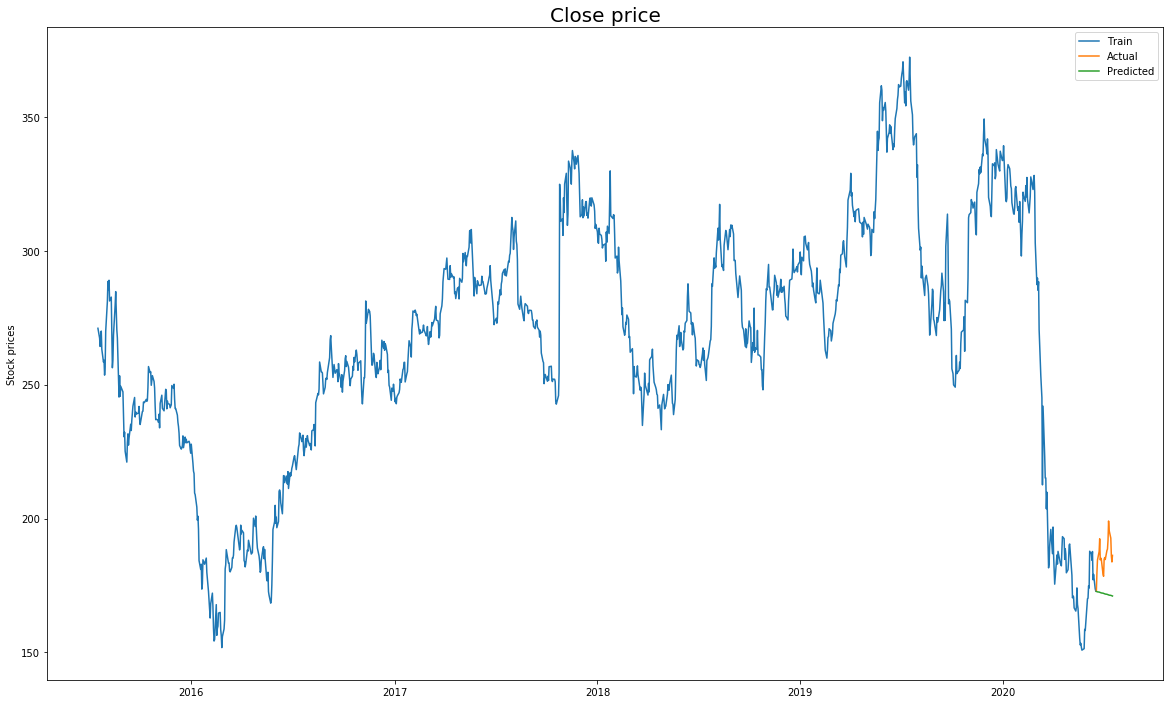

In [103]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

# 5. Seasonal Autoregressive Integrated Moving-Average (SARIMA)

The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

The method is suitable for univariate time series with trend and/or seasonal components.

In [104]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train_df['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1206, 1227)
print(yhat)

# model = AutoReg(train_df['Close'], lags=1)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.predict(982, 1227)
# print(yhat)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1206    173.554048
1207    175.132275
1208    175.609751
1209    175.511674
1210    176.416117
1211    175.992882
1212    175.613634
1213    175.272409
1214    173.908230
1215    173.553693
1216    173.295711
1217    172.865171
1218    172.957818
1219    174.622630
1220    174.796862
1221    174.752056
1222    174.704664
1223    174.323810
1224    174.090906
1225    173.483233
1226    172.800450
1227    172.271252
dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [105]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

171.53687314296715

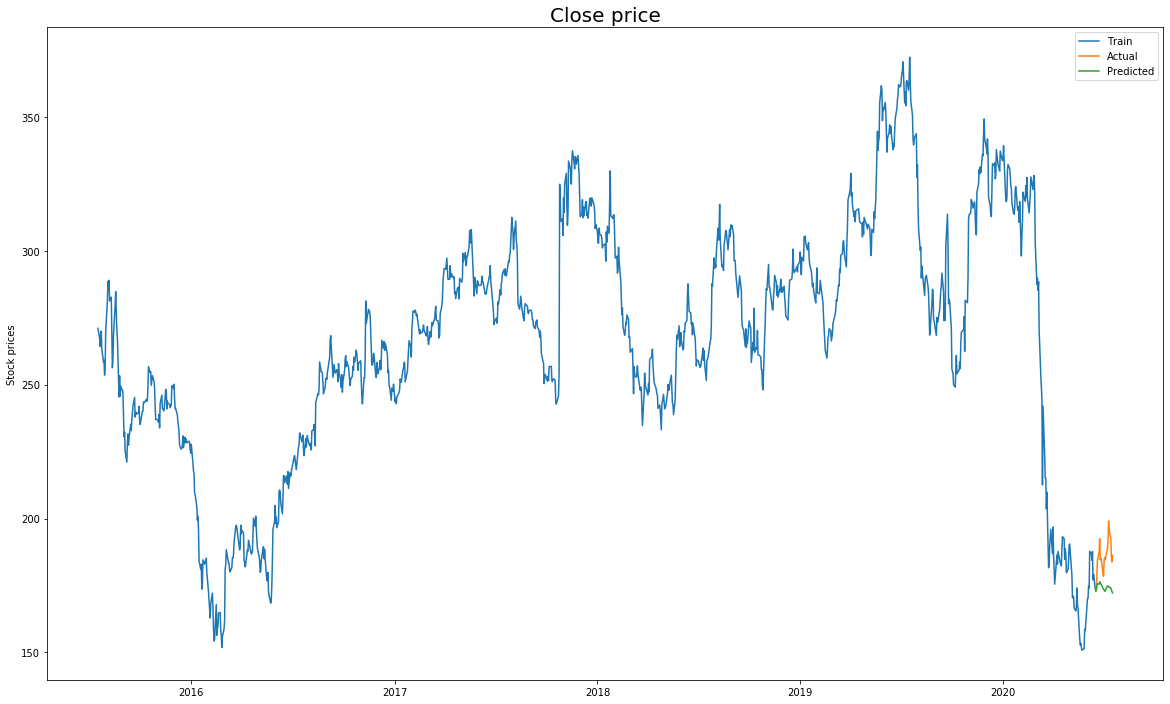

In [106]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

# 6. Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

The Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) is an extension of the SARIMA model that also includes the modeling of exogenous variables.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series may be referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The SARIMAX method can also be used to model the subsumed models with exogenous variables, such as ARX, MAX, ARMAX, and ARIMAX.

The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.

In [107]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train_df['Close'], exog=train_df['Open'], order=(1, 1, 1), seasonal_order=(1,1,1,4))
model_fit = model.fit(disp=False)
# make prediction

yhat = model_fit.predict(1206, 1227, exog = valid_df['Open'])
print(yhat)

# model = AutoReg(train_df['Close'], lags=1)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.predict(982, 1227)
# print(yhat)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1206    170.609584
1207    172.534756
1208    180.033527
1209    184.591266
1210    188.821029
1211    194.679915
1212    181.923496
1213    187.573143
1214    182.286430
1215    181.119809
1216    179.199502
1217    185.244990
1218    185.895764
1219    186.559892
1220    186.668250
1221    188.458496
1222    191.979091
1223    197.838553
1224    198.342755
1225    191.820450
1226    187.176911
1227    184.971219
dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [108]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

19.148830979052732

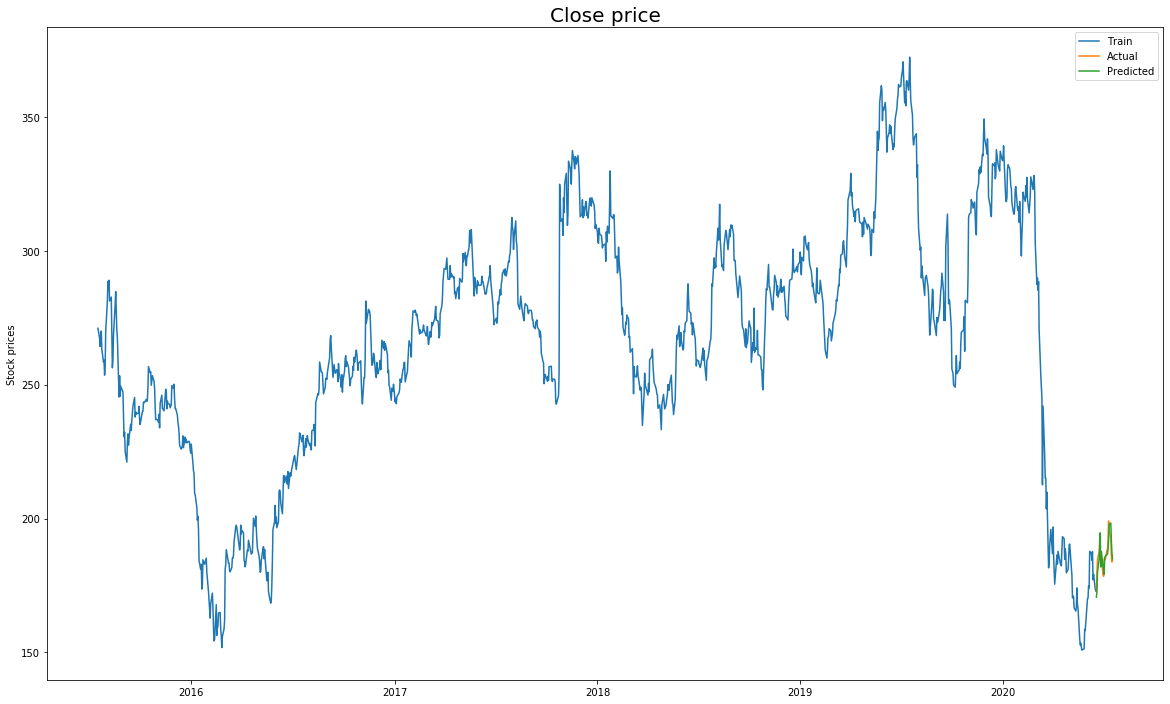

In [109]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

# 7. Vector Autoregression (VAR)

The Vector Autoregression (VAR) method models the next step in each time series using an AR model. It is the generalization of AR to multiple parallel time series, e.g. multivariate time series.

The notation for the model involves specifying the order for the AR(p) model as parameters to a VAR function, e.g. VAR(p).

The method is suitable for multivariate time series without trend and seasonal components.

In [110]:
# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR

# fit model
model = VAR(train_df)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=22)
print(yhat)

[[1.72849655e+02 1.77589178e+02 1.68242960e+02 1.73015755e+02
  1.73005268e+02 6.24234561e+07]
 [1.73462416e+02 1.77902947e+02 1.69189184e+02 1.73460408e+02
  1.73441540e+02 5.82810482e+07]
 [1.73972267e+02 1.78260001e+02 1.69903489e+02 1.74066831e+02
  1.74039416e+02 5.53997339e+07]
 [1.74606473e+02 1.78815128e+02 1.70670890e+02 1.74768335e+02
  1.74732406e+02 5.34847000e+07]
 [1.75327090e+02 1.79484902e+02 1.71474441e+02 1.75530177e+02
  1.75485798e+02 5.21668458e+07]
 [1.76100769e+02 1.80224721e+02 1.72300098e+02 1.76328350e+02
  1.76275601e+02 5.12359342e+07]
 [1.76906156e+02 1.81006762e+02 1.73137687e+02 1.77147142e+02
  1.77086110e+02 5.05565134e+07]
 [1.77729178e+02 1.81813138e+02 1.73980165e+02 1.77976337e+02
  1.77907119e+02 5.00410052e+07]
 [1.78560676e+02 1.82632318e+02 1.74822876e+02 1.78809325e+02
  1.78732019e+02 4.96326618e+07]
 [1.79394720e+02 1.83456863e+02 1.75662802e+02 1.79641841e+02
  1.79556546e+02 4.92946618e+07]
 [1.80227486e+02 1.84281974e+02 1.76498004e+02 1.8

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [111]:
yhat = pd.DataFrame(yhat)
yhat.index = valid_df.index
yhat.columns = valid_df.columns
yhat.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-17,172.849655,177.589178,168.242960,173.015755,173.005268,6.242346e+07
2020-06-18,173.462416,177.902947,169.189184,173.460408,173.441540,5.828105e+07


In [112]:
mse(yhat['Close'], valid_df['Close'])

57.89097467030019

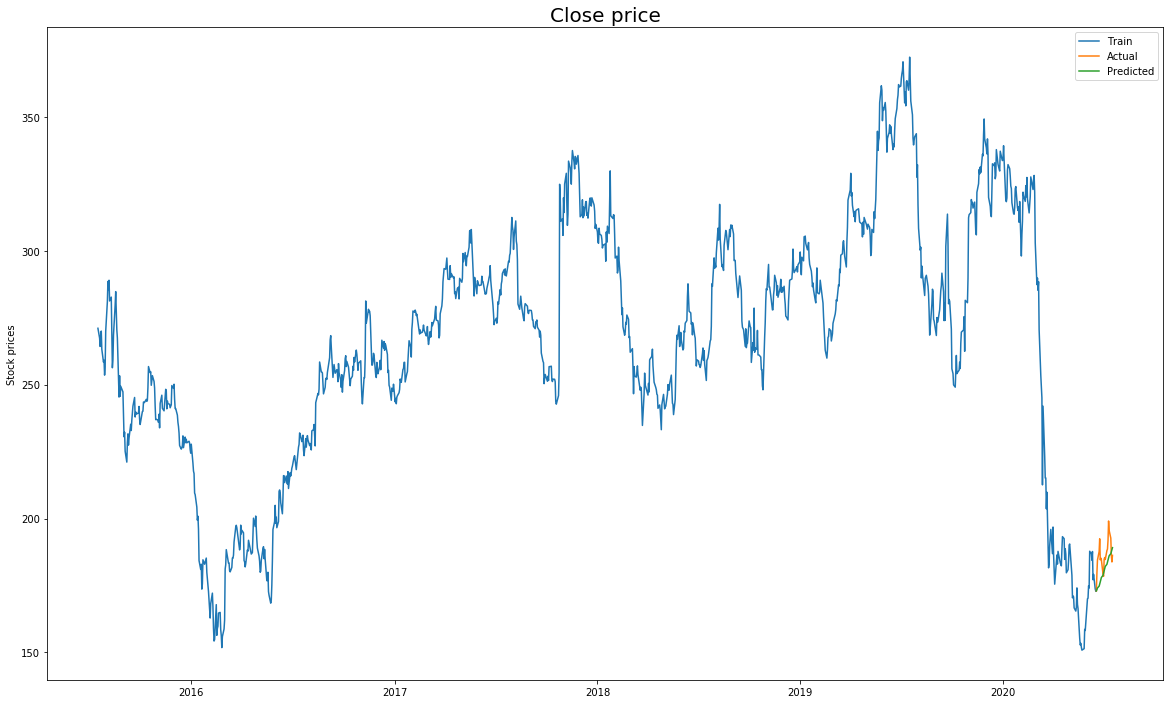

In [113]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat['Close'], label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

# 8. Vector Autoregression Moving-Average (VARMA)

The Vector Autoregression Moving-Average (VARMA) method models the next step in each time series using an ARMA model. It is the generalization of ARMA to multiple parallel time series, e.g. multivariate time series.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to a VARMA function, e.g. VARMA(p, q). A VARMA model can also be used to develop VAR or VMA models.

The method is suitable for multivariate time series without trend and seasonal components.

In [114]:
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX

# fit model
model = VARMAX(train_df, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast(steps = 22)
print(yhat)

# # fit model
# model = VAR(train_df)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.forecast(model_fit.y, steps=246)
# print(yhat)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\linalg\_solvers.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.5305e-28): result may not be accurate.
  x = solve(lhs, q.flatten())
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\linalg\_solvers.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.37309e-27): result may not be accurate.
  x = solve(lhs, q.flatten())
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimi

            Open        High         Low       Close   Adj Close        Volume
1206  172.955131  177.840078  169.076498  173.501648  173.481215  6.218246e+07
1207  174.115375  178.406652  169.920847  174.030613  173.997079  5.764966e+07
1208  174.632073  178.870725  170.596251  174.716266  174.669323  5.491498e+07
1209  175.341253  179.526348  171.421649  175.497017  175.436774  5.305698e+07
1210  176.140041  180.280476  172.296383  176.335986  176.262543  5.175036e+07
1211  176.990095  181.098022  173.195252  177.208646  177.122116  5.081090e+07
1212  177.869521  181.953900  174.105174  178.099594  178.000097  5.011192e+07
1213  178.764404  182.831371  175.018503  178.998961  178.886623  4.957033e+07
1214  179.665865  183.719507  175.930557  179.900399  179.775348  4.913192e+07
1215  180.568206  184.611218  176.838396  180.799830  180.662196  4.876145e+07
1216  181.467771  185.501928  177.740161  181.694643  181.544557  4.843600e+07
1217  182.362223  186.388701  178.634688  182.583180

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [115]:
yhat = pd.DataFrame(yhat)
yhat.index = valid_df.index
yhat.columns = valid_df.columns
yhat.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-17,172.955131,177.840078,169.076498,173.501648,173.481215,6.218246e+07
2020-06-18,174.115375,178.406652,169.920847,174.030613,173.997079,5.764966e+07


In [116]:
mse(yhat['Close'], valid_df['Close'])

48.20321132990827

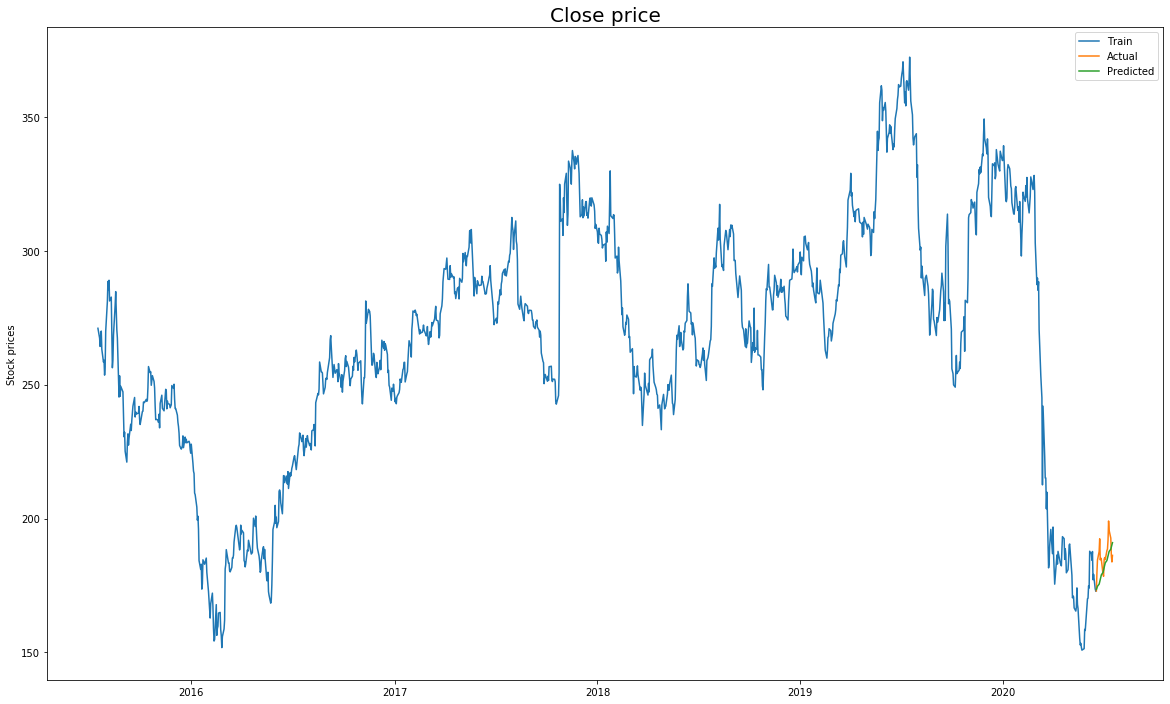

In [117]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat['Close'], label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

# 9. Vector Autoregression Moving-Average with Exogenous Regressors(VARMAX)

The Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX) is an extension of the VARMA model that also includes the modeling of exogenous variables. It is a multivariate version of the ARMAX method.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series(es) are referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The VARMAX method can also be used to model the subsumed models with exogenous variables, such as VARX and VMAX.

The method is suitable for multivariate time series without trend and seasonal components with exogenous variables.

In [118]:
# VARMAX example
from statsmodels.tsa.statespace.varmax import VARMAX

# fit model
model = VARMAX(train_df.iloc[:, :5], exog=train_df['Volume'], order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction

yhat = model_fit.forecast(steps = 22, exog=valid_df['Volume'])
print(yhat)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


            Open        High         Low       Close   Adj Close
1206  174.340485  181.172615  169.661193  176.236578  176.057976
1207  177.967719  184.146619  173.614216  179.688265  179.376470
1208  180.590049  187.881880  175.288451  182.319050  181.884116
1209  182.684020  190.593890  176.960546  184.607811  184.074099
1210  185.345910  192.461513  180.212465  187.168396  186.543702
1211  187.559957  195.056445  182.022223  189.267991  188.554404
1212  189.489251  197.070247  183.873750  191.224649  190.434119
1213  192.364455  198.298398  187.930350  193.810048  192.939110
1214  195.096641  200.626019  190.765404  196.195047  195.232604
1215  197.722140  202.655106  193.742098  198.637846  197.585227
1216  199.717833  205.197317  195.230761  200.584745  199.447052
1217  201.506857  207.063926  196.965175  202.423545  201.213576
1218  203.835228  208.454313  199.953545  204.571074  203.289162
1219  205.829990  210.548487  201.748588  206.403676  205.047694
1220  207.043033  212.607

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


In [119]:
yhat = pd.DataFrame(yhat)
yhat.index = valid_df.index

In [120]:
cols = valid_df.columns

In [121]:
yhat.columns = cols[:-1]
yhat.head(2)

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-06-17,174.340485,181.172615,169.661193,176.236578,176.057976
2020-06-18,177.967719,184.146619,173.614216,179.688265,179.376470


In [122]:
mse(yhat['Close'], valid_df['Close'])

215.16156079310088

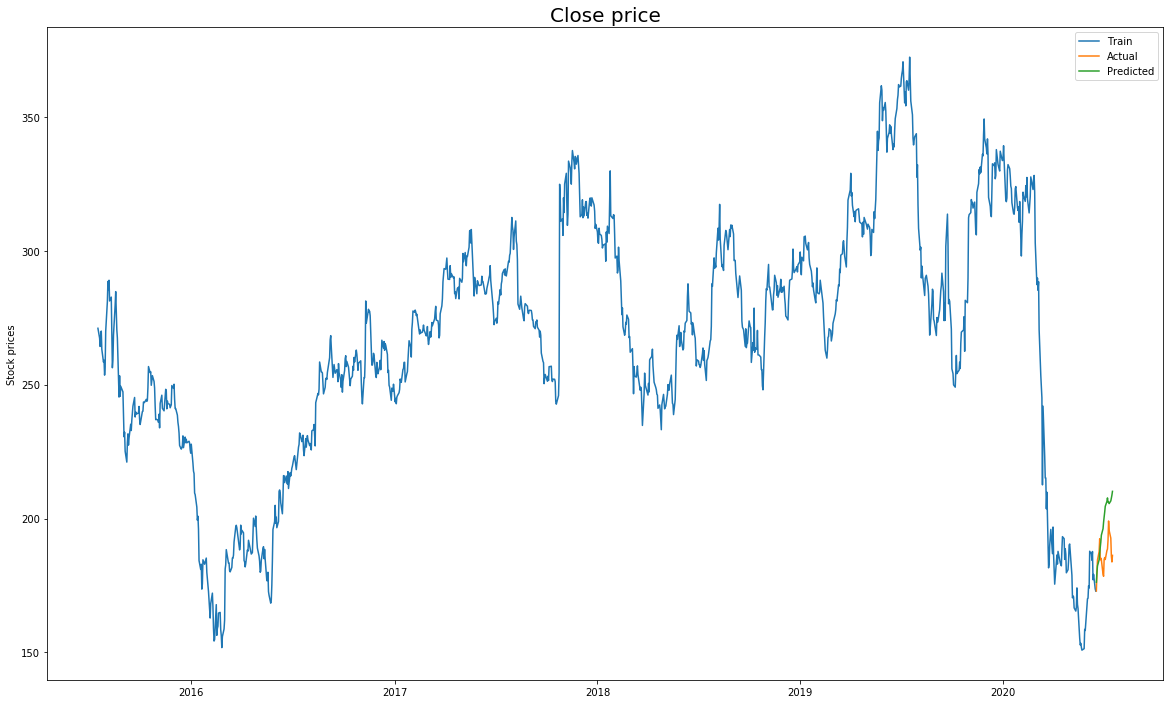

In [123]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat['Close'], label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

# 10. Simple Exponential Smoothing (SES)

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components.

In [124]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train_df['Close'])
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1206, 1227)
print(yhat)

1206    172.907146
1207    172.907146
1208    172.907146
1209    172.907146
1210    172.907146
1211    172.907146
1212    172.907146
1213    172.907146
1214    172.907146
1215    172.907146
1216    172.907146
1217    172.907146
1218    172.907146
1219    172.907146
1220    172.907146
1221    172.907146
1222    172.907146
1223    172.907146
1224    172.907146
1225    172.907146
1226    172.907146
1227    172.907146
dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [125]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

209.71386763118005

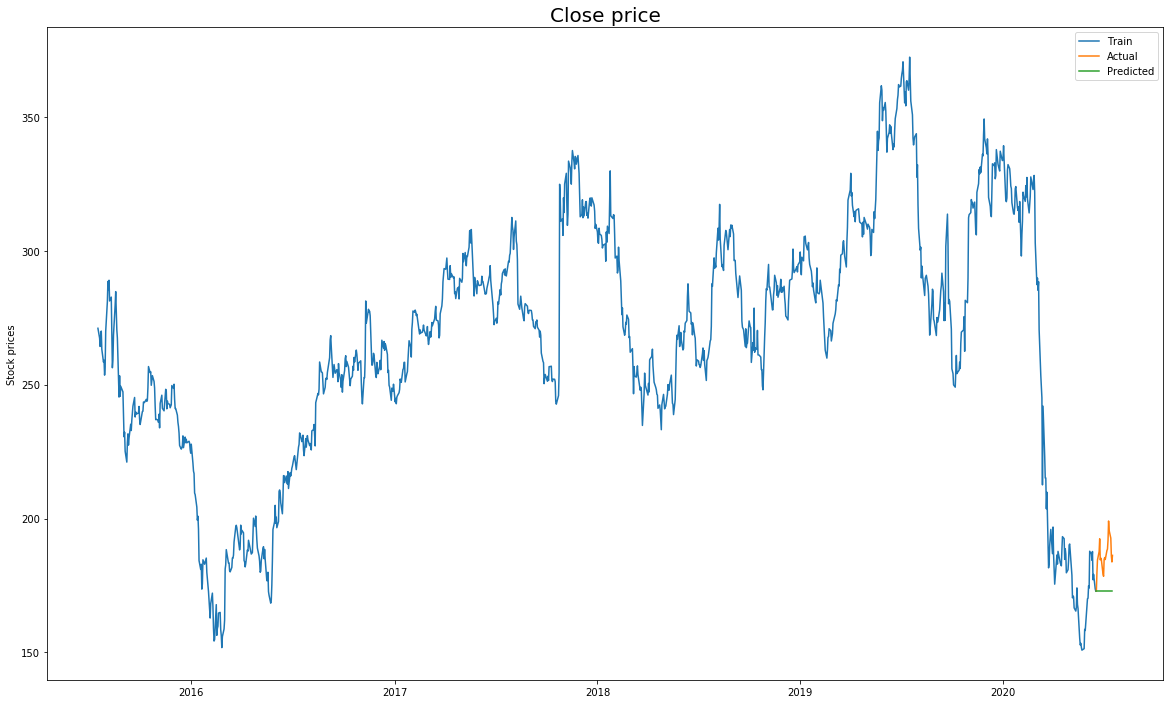

In [126]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

# 11. Holt Winter's Exponential Smoothing (HWES)

The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

The method is suitable for univariate time series with trend and/or seasonal components.

In [127]:
valid_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-17,171.000000,176.199997,169.250000,172.949997,172.949997,73866905
2020-06-18,172.399994,180.649994,171.100006,179.649994,179.649994,58261857
2020-06-19,180.300003,184.949997,179.500000,184.500000,184.500000,76895151
2020-06-22,185.000000,191.750000,184.250000,187.699997,187.699997,80023958
2020-06-23,189.600006,193.100006,187.850006,192.449997,192.449997,65487085
2020-06-24,194.800003,194.899994,183.899994,184.600006,184.600006,74668987
2020-06-25,182.199997,186.800003,180.399994,185.250000,185.250000,73620385
2020-06-26,188.000000,188.600006,183.800003,184.600006,184.600006,49176958
2020-06-29,183.000000,183.100006,178.500000,179.250000,179.250000,50966428


In [128]:
history = [x for x in train_df['Close']]
print(type(history))

<class 'list'>


In [130]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

predictions = list()

for t in range(len(valid_df)):
    print(t)
    model = ExponentialSmoothing(history) # (p,d,q) here q is zero meaning the model is autoregressive (AR model)
    model_fit = model.fit()
    yhat = model_fit.predict()   # outputs a tuple, with first as forecast, second as std. error 
                                    # third as conf_int default is 95 %
    #yhat = output[0]
    predictions.append(yhat)
    obs = valid_df['Close'][t]
    history.append(obs)
    print(len(history))
    #print('predicted=%f, expected=%f' % (yhat, obs))

0
1207
1
1208
2
1209
3
1210
4
1211
5
1212
6
1213
7
1214
8
1215
9
1216
10
1217
11
1218
12
1219
13
1220
14
1221
15
1222
16


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


1223
17
1224
18
1225
19
1226
20
1227
21
1228


In [131]:
predictions = np.array(predictions)
predictions = pd.DataFrame(predictions)
predictions.index = valid_df.index

mse(predictions, valid_df['Close'])

17.5272137214031

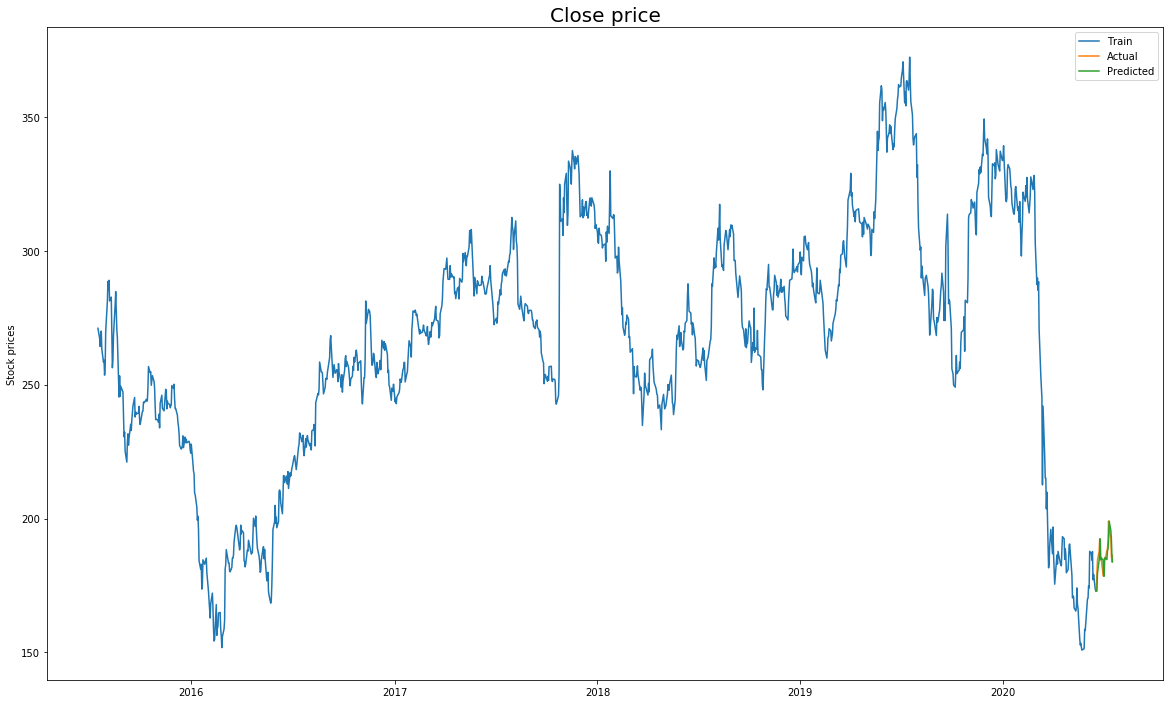

In [132]:
plt.figure(figsize=(20,12))

plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

In [135]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_df['Close'])
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1206, 1227)
print(yhat)

1206    172.907146
1207    172.907146
1208    172.907146
1209    172.907146
1210    172.907146
1211    172.907146
1212    172.907146
1213    172.907146
1214    172.907146
1215    172.907146
1216    172.907146
1217    172.907146
1218    172.907146
1219    172.907146
1220    172.907146
1221    172.907146
1222    172.907146
1223    172.907146
1224    172.907146
1225    172.907146
1226    172.907146
1227    172.907146
dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [136]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

209.71386763118005

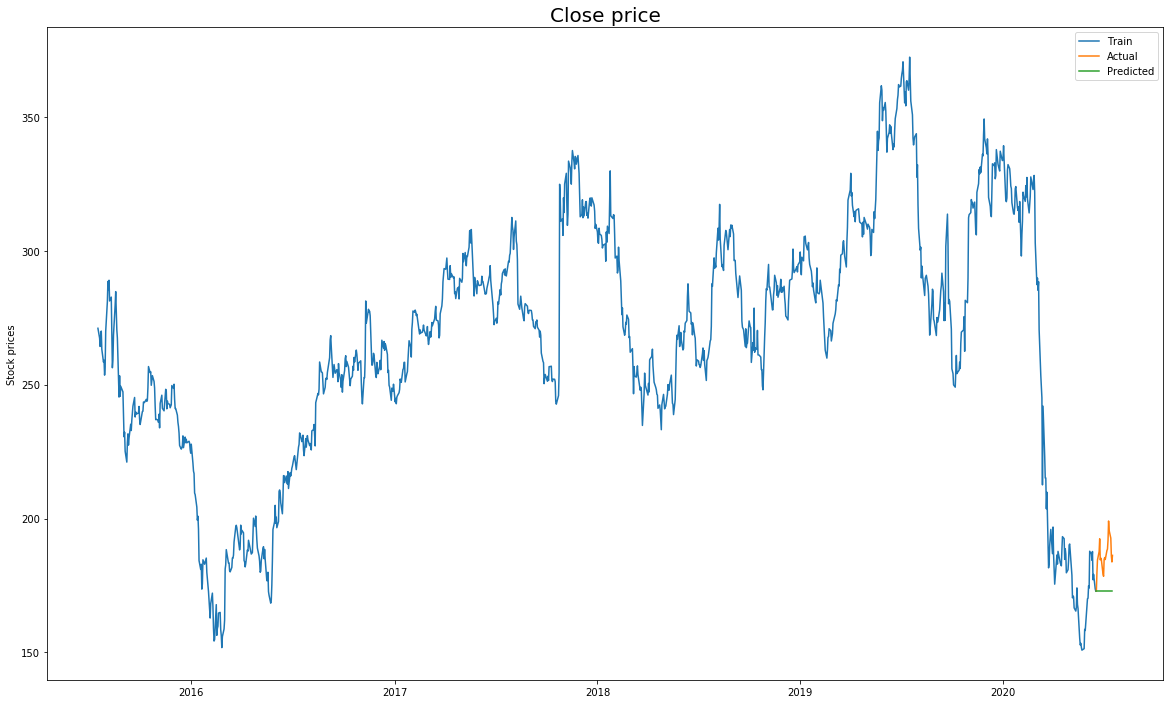

In [137]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()